In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
from sklearn.decomposition import PCA

In [27]:
df = pd.read_csv('../data/crawler/unified-events-statistics.csv')
def qtd_eventos(integer):
    qtdNulos = integer / 2
    return int(45 - qtdNulos)

qtd_eventos = list(map(qtd_eventos, df.isnull().sum(axis=1).tolist()))
df['qtd_eventos'] = qtd_eventos
# df.iloc[0,:]['event{}time'.format(qtd_eventos[0])]
# qtd_eventos[0]
# 'event{}time'.format(qtd_eventos[0])
# df.iloc[0,:]['qtd_eventos']
for index, row in df.iterrows():
    qtdEventos = row['qtd_eventos']
    duracao = row['event{}time'.format(qtdEventos)]    
    df.at[index, 'duracao'] = duracao
    df.at[index, 'duracao_min'] = int(duracao.split(':')[0])

df = df.astype({'duracao_min':'int'})

In [28]:
df.head()

,golId,game,event1,event2,event3,event4,event5,event6,event7,event8,...,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos,duracao,duracao_min
0,35797,ESPORTSTMNT04_2090170,RED: first_blood,BLUE: herald,RED: dragon,BLUE: first_tower_bot,RED: dragon,BLUE: herald,RED: first_tower_bot,BLUE: first_tower_mid,...,0,0.00,0.0,7,0.57,7.50,0,29,40:28,40
1,35798,ESPORTSTMNT04_2090187,BLUE: herald,RED: first_blood,BLUE: first_tower_bot,RED: dragon,BLUE: first_tower_mid,RED: first_tower_top,RED: herald,RED: first_tower_mid,...,0,0.00,0.0,12,0.58,2.05,0,35,48:34,48
2,35799,ESPORTSTMNT04_2090207,BLUE: first_blood,BLUE: dragon,RED: herald,BLUE: first_tower_bot,BLUE: dragon,RED: herald,BLUE: first_tower_top,RED: dragon,...,3,0.33,6.5,5,0.20,3.79,1,28,38:30,38
3,35800,ESPORTSTMNT04_2090210,RED: first_blood,RED: herald,BLUE: dragon,BLUE: herald,RED: first_tower_bot,BLUE: dragon,BLUE: first_tower_mid,BLUE: first_tower_top,...,0,0.00,0.0,2,0.00,1.22,1,24,34:06,34
4,35801,ESPORTSTMNT04_2090214,RED: first_blood,RED: herald,BLUE: dragon,RED: first_tower_top,BLUE: dragon,RED: first_tower_bot,RED: second_tower_bot,BLUE: herald,...,0,0.00,0.0,0,0.00,0.00,0,29,39:10,39


In [29]:
df = df.drop(['golId','game', 'duracao','event6','event7','event8','event9','event10','event11','event12','event13','event14','event15','event16','event17','event18','event19','event20','event21','event22','event23','event24','event25','event26','event27','event28','event29','event30','event31','event32','event33','event34','event35','event36','event37','event38','event39','event40','event41','event42','event43','event44','event45','event1time','event2time','event3time','event4time','event5time','event6time','event7time','event8time','event9time','event10time','event11time','event12time','event13time','event14time','event15time','event16time','event17time','event18time','event19time','event20time','event21time','event22time','event23time','event24time','event25time','event26time','event27time','event28time','event29time','event30time','event31time','event32time','event33time','event34time','event35time','event36time','event37time','event38time','event39time','event40time','event41time','event42time','event43time','event44time','event45time'],axis=1)
y = df.result
df = df.replace(['BLUE: first_blood',
    'BLUE: dragon',
    'BLUE: herald',
    'BLUE: first_tower_top',
    'BLUE: first_tower_mid',
    'BLUE: first_tower_bot',
    'BLUE: second_tower_top',
    'BLUE: second_tower_mid',
    'BLUE: second_tower_bot',
    'BLUE: third_tower_top',
    'BLUE: third_tower_mid',
    'BLUE: third_tower_bot',
    'BLUE: inhibitor_top',
    'BLUE: inhibitor_mid',
    'BLUE: inhibitor_bot',
    'BLUE: baron',
    'BLUE: elder_dragon',
    'BLUE: nexus_tower',
    'BLUE: nexus',
    'RED: first_blood',
    'RED: dragon',
    'RED: herald',
    'RED: first_tower_top',
    'RED: first_tower_mid',
    'RED: first_tower_bot',
    'RED: second_tower_top',
    'RED: second_tower_mid',
    'RED: second_tower_bot',
    'RED: third_tower_top',
    'RED: third_tower_mid',
    'RED: third_tower_bot',
    'RED: inhibitor_top',
    'RED: inhibitor_mid',
    'RED: inhibitor_bot',
    'RED: baron',
    'RED: elder_dragon',
    'RED: nexus_tower',
    'RED: nexus'], range(38))
x = df.drop(['result'],axis=1)
df.head()

,event1,event2,event3,event4,event5,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,...,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos,duracao_min
0,19,2,20,5,20,0,0.00,0.00,0,0.00,...,0.00,0,0.00,0.0,7,0.57,7.50,0,29,40
1,2,19,5,20,4,0,0.00,0.00,2,0.00,...,3.45,0,0.00,0.0,12,0.58,2.05,0,35,48
2,0,1,21,5,1,2,0.00,1.00,5,1.00,...,7.67,3,0.33,6.5,5,0.20,3.79,1,28,38
3,19,21,1,2,24,3,0.33,4.25,0,0.00,...,6.60,0,0.00,0.0,2,0.00,1.22,1,24,34
4,19,21,1,22,1,0,0.00,0.00,3,0.33,...,0.00,0,0.00,0.0,0,0.00,0.00,0,29,39


In [30]:
df

,event1,event2,event3,event4,event5,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,...,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos,duracao_min
0,19,2,20,5,20,0,0.00,0.00,0,0.00,...,0.00,0,0.00,0.00,7,0.57,7.50,0,29,40
1,2,19,5,20,4,0,0.00,0.00,2,0.00,...,3.45,0,0.00,0.00,12,0.58,2.05,0,35,48
2,0,1,21,5,1,2,0.00,1.00,5,1.00,...,7.67,3,0.33,6.50,5,0.20,3.79,1,28,38
3,19,21,1,2,24,3,0.33,4.25,0,0.00,...,6.60,0,0.00,0.00,2,0.00,1.22,1,24,34
4,19,21,1,22,1,0,0.00,0.00,3,0.33,...,0.00,0,0.00,0.00,0,0.00,0.00,0,29,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,19,1,2,20,22,2,0.50,3.67,8,0.62,...,0.00,4,0.50,4.45,2,1.00,0.92,0,23,28
6010,19,20,21,20,21,4,0.25,2.83,10,0.80,...,5.67,5,0.20,4.50,5,0.80,5.22,0,19,30
6011,20,0,21,1,22,5,0.80,2.91,3,1.00,...,5.62,4,0.25,9.75,1,1.00,1.25,1,21,32
6012,20,21,0,20,21,0,0.00,0.00,2,0.00,...,13.00,0,0.00,0.00,0,0.00,0.00,0,23,27


# of red team victory:  2882
# of blue team victory:  3132


c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



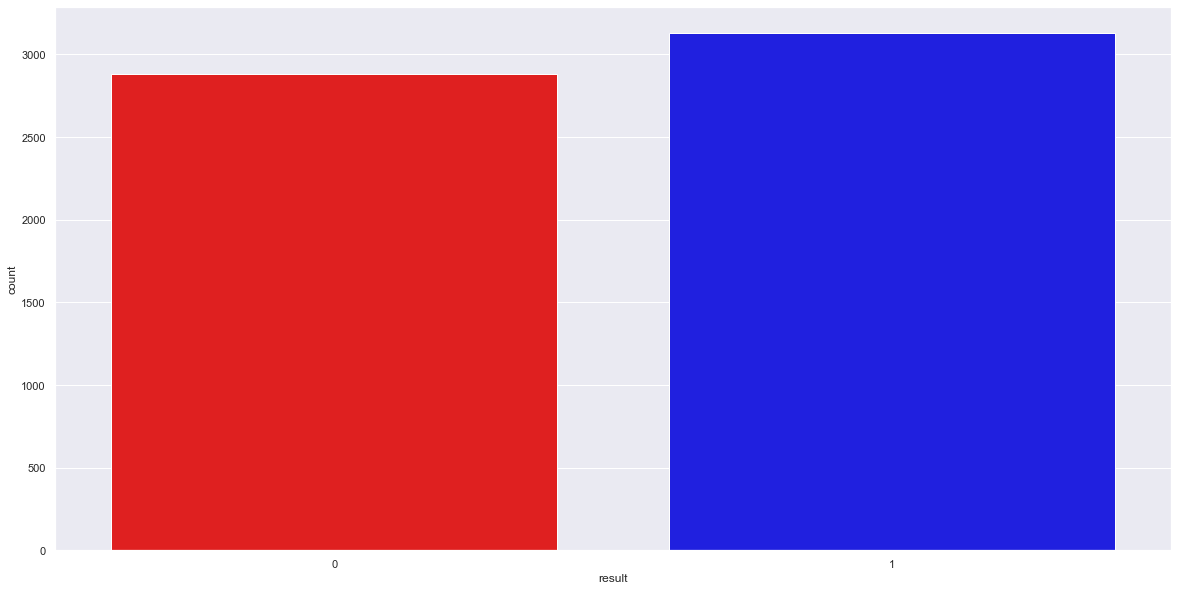

In [31]:
ax = sns.countplot(y,palette=['red','blue'])
B,R = y.value_counts()
print('# of red team victory: ', R)
print('# of blue team victory: ', B)

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



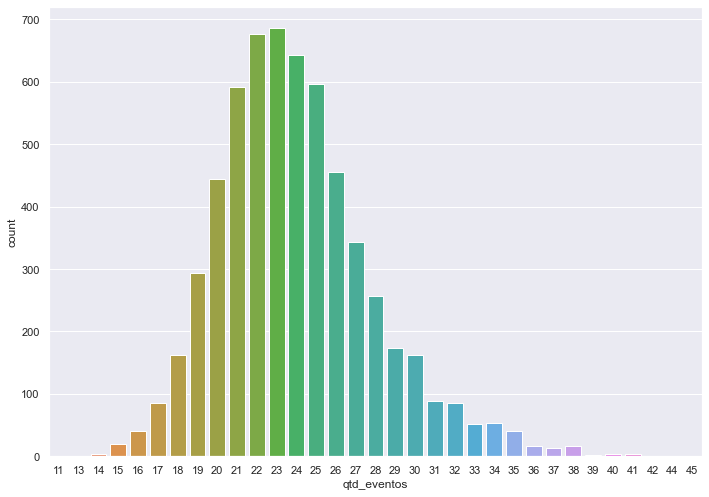

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(df['qtd_eventos'])

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



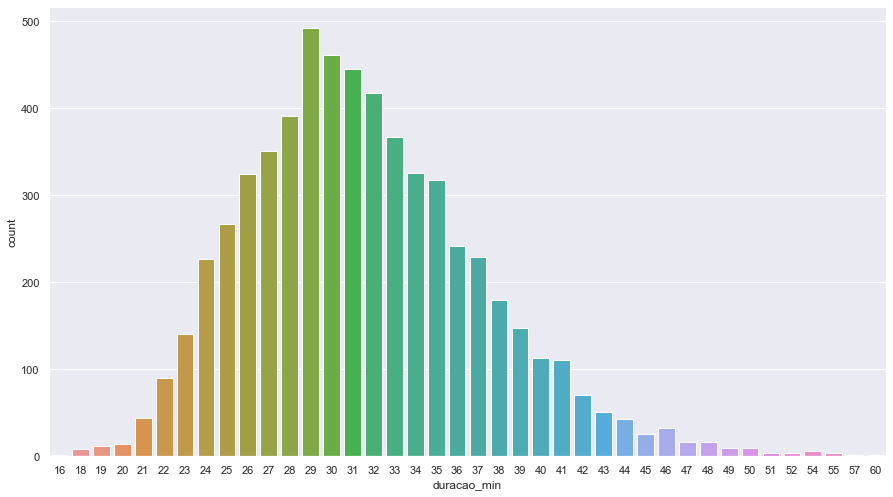

In [33]:
sns.set(rc={'figure.figsize':(15,8.27)})
ax = sns.countplot(df.sort_values(by=['duracao_min'])['duracao_min'])

In [34]:
df

,event1,event2,event3,event4,event5,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,...,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos,duracao_min
0,19,2,20,5,20,0,0.00,0.00,0,0.00,...,0.00,0,0.00,0.00,7,0.57,7.50,0,29,40
1,2,19,5,20,4,0,0.00,0.00,2,0.00,...,3.45,0,0.00,0.00,12,0.58,2.05,0,35,48
2,0,1,21,5,1,2,0.00,1.00,5,1.00,...,7.67,3,0.33,6.50,5,0.20,3.79,1,28,38
3,19,21,1,2,24,3,0.33,4.25,0,0.00,...,6.60,0,0.00,0.00,2,0.00,1.22,1,24,34
4,19,21,1,22,1,0,0.00,0.00,3,0.33,...,0.00,0,0.00,0.00,0,0.00,0.00,0,29,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,19,1,2,20,22,2,0.50,3.67,8,0.62,...,0.00,4,0.50,4.45,2,1.00,0.92,0,23,28
6010,19,20,21,20,21,4,0.25,2.83,10,0.80,...,5.67,5,0.20,4.50,5,0.80,5.22,0,19,30
6011,20,0,21,1,22,5,0.80,2.91,3,1.00,...,5.62,4,0.25,9.75,1,1.00,1.25,1,21,32
6012,20,21,0,20,21,0,0.00,0.00,2,0.00,...,13.00,0,0.00,0.00,0,0.00,0.00,0,23,27


<AxesSubplot:>

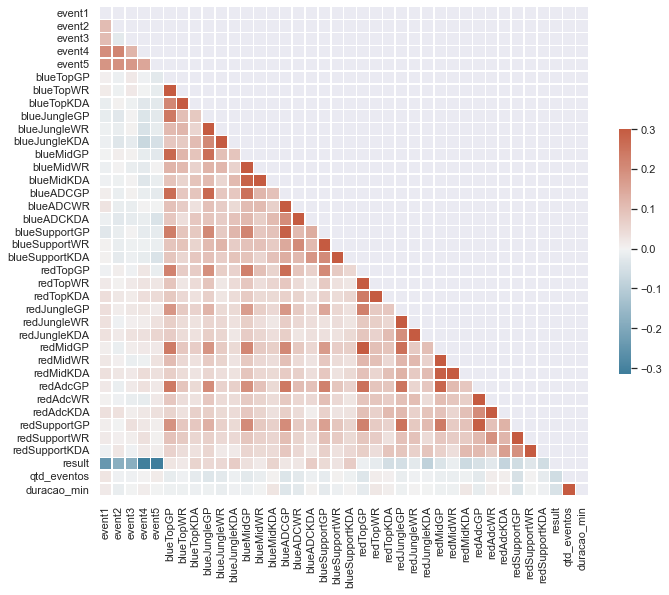

In [35]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 0.98, 'Relação entre qtd de eventos e vencedor')

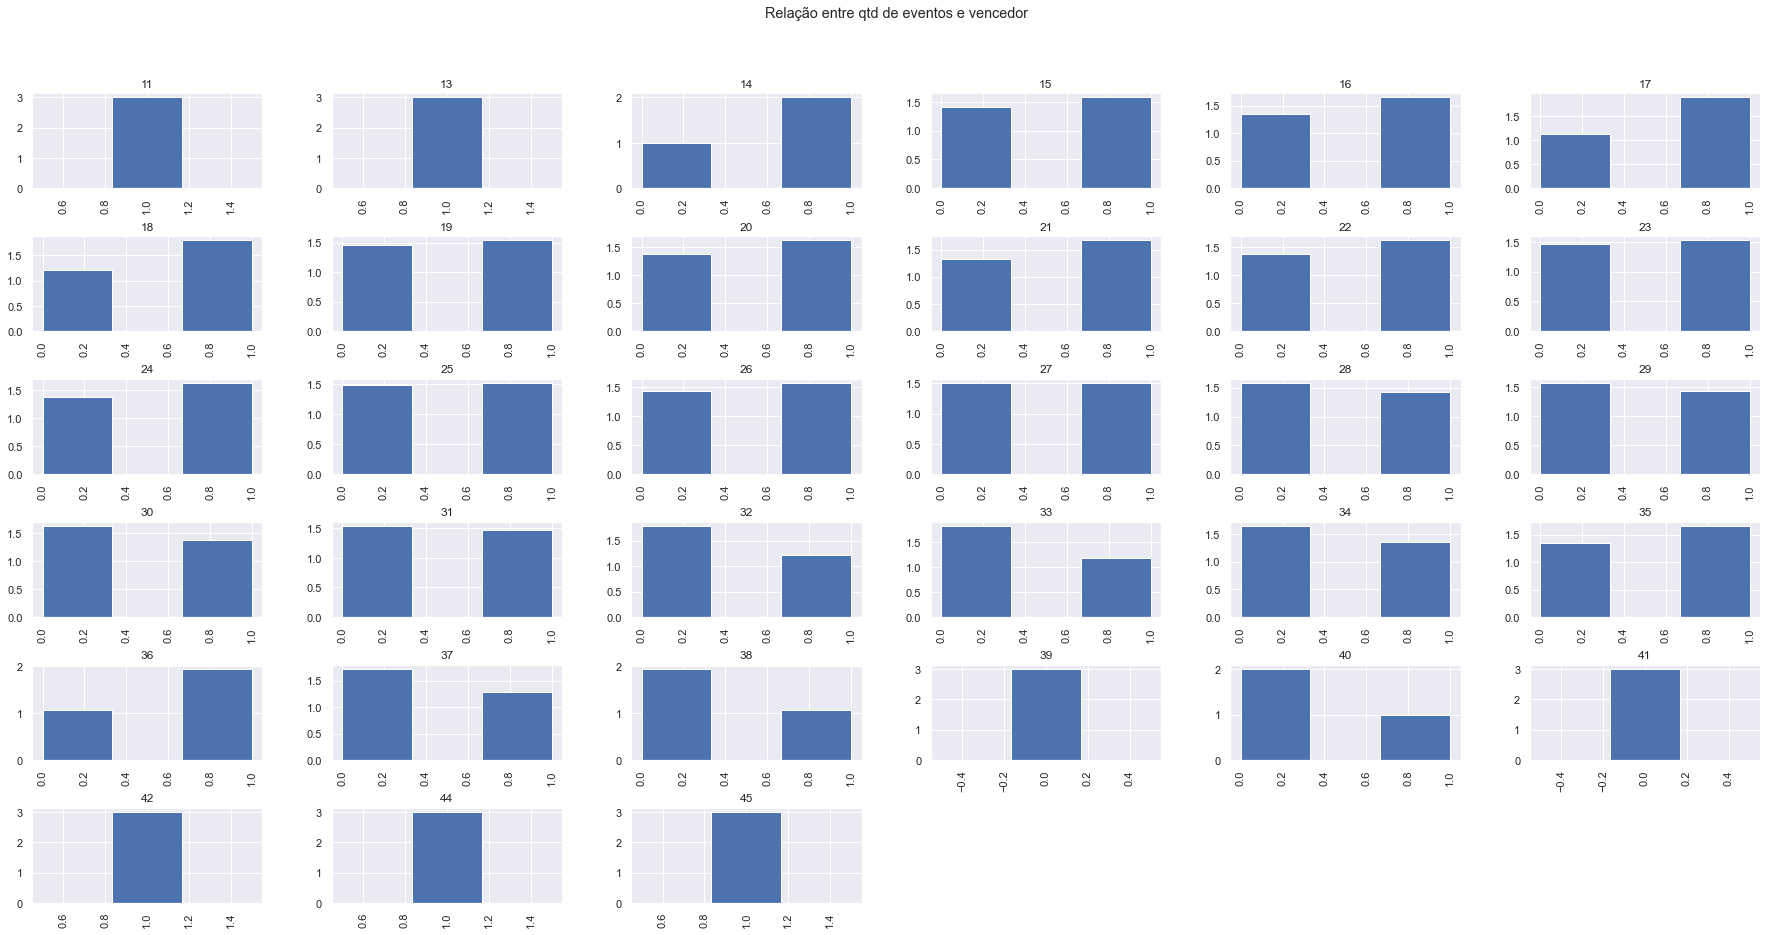

In [36]:
df.hist(column='result', by='qtd_eventos', bins=3,figsize=(30,15),density=1)
plt.suptitle('Relação entre qtd de eventos e vencedor')

Text(0.5, 0.98, 'Relação entre duração e vencedor')

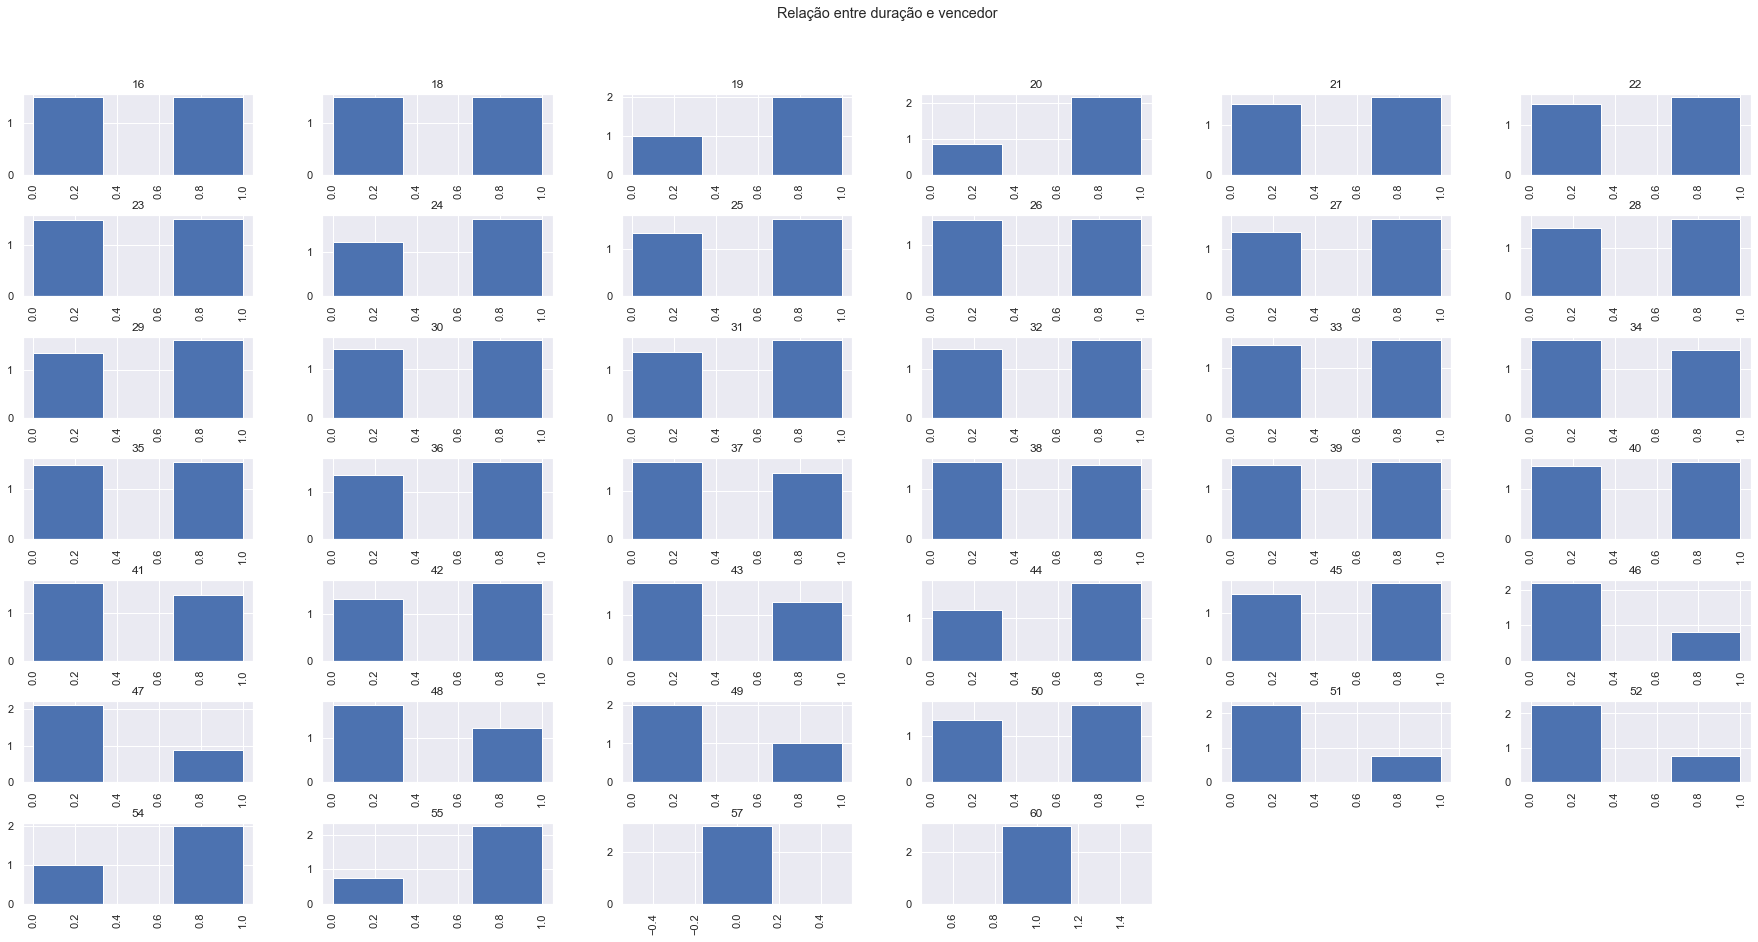

In [37]:
df.hist(column='result', by='duracao_min', bins=3,figsize=(30,15),density=1)
plt.suptitle('Relação entre duração e vencedor')

In [38]:
features = ['event1','event2','event3', 'event4', 'event5', 'duracao_min', 'blueTopGP','blueTopWR','blueTopKDA','blueJungleGP','blueJungleWR','blueJungleKDA','blueMidGP','blueMidWR','blueMidKDA','blueADCGP','blueADCWR','blueADCKDA','blueSupportGP','blueSupportWR','blueSupportKDA','redTopGP','redTopWR','redTopKDA','redJungleGP','redJungleWR','redJungleKDA','redMidGP','redMidWR','redMidKDA','redAdcGP','redAdcWR','redAdcKDA','redSupportGP','redSupportWR','redSupportKDA']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['result'])
fig.show()

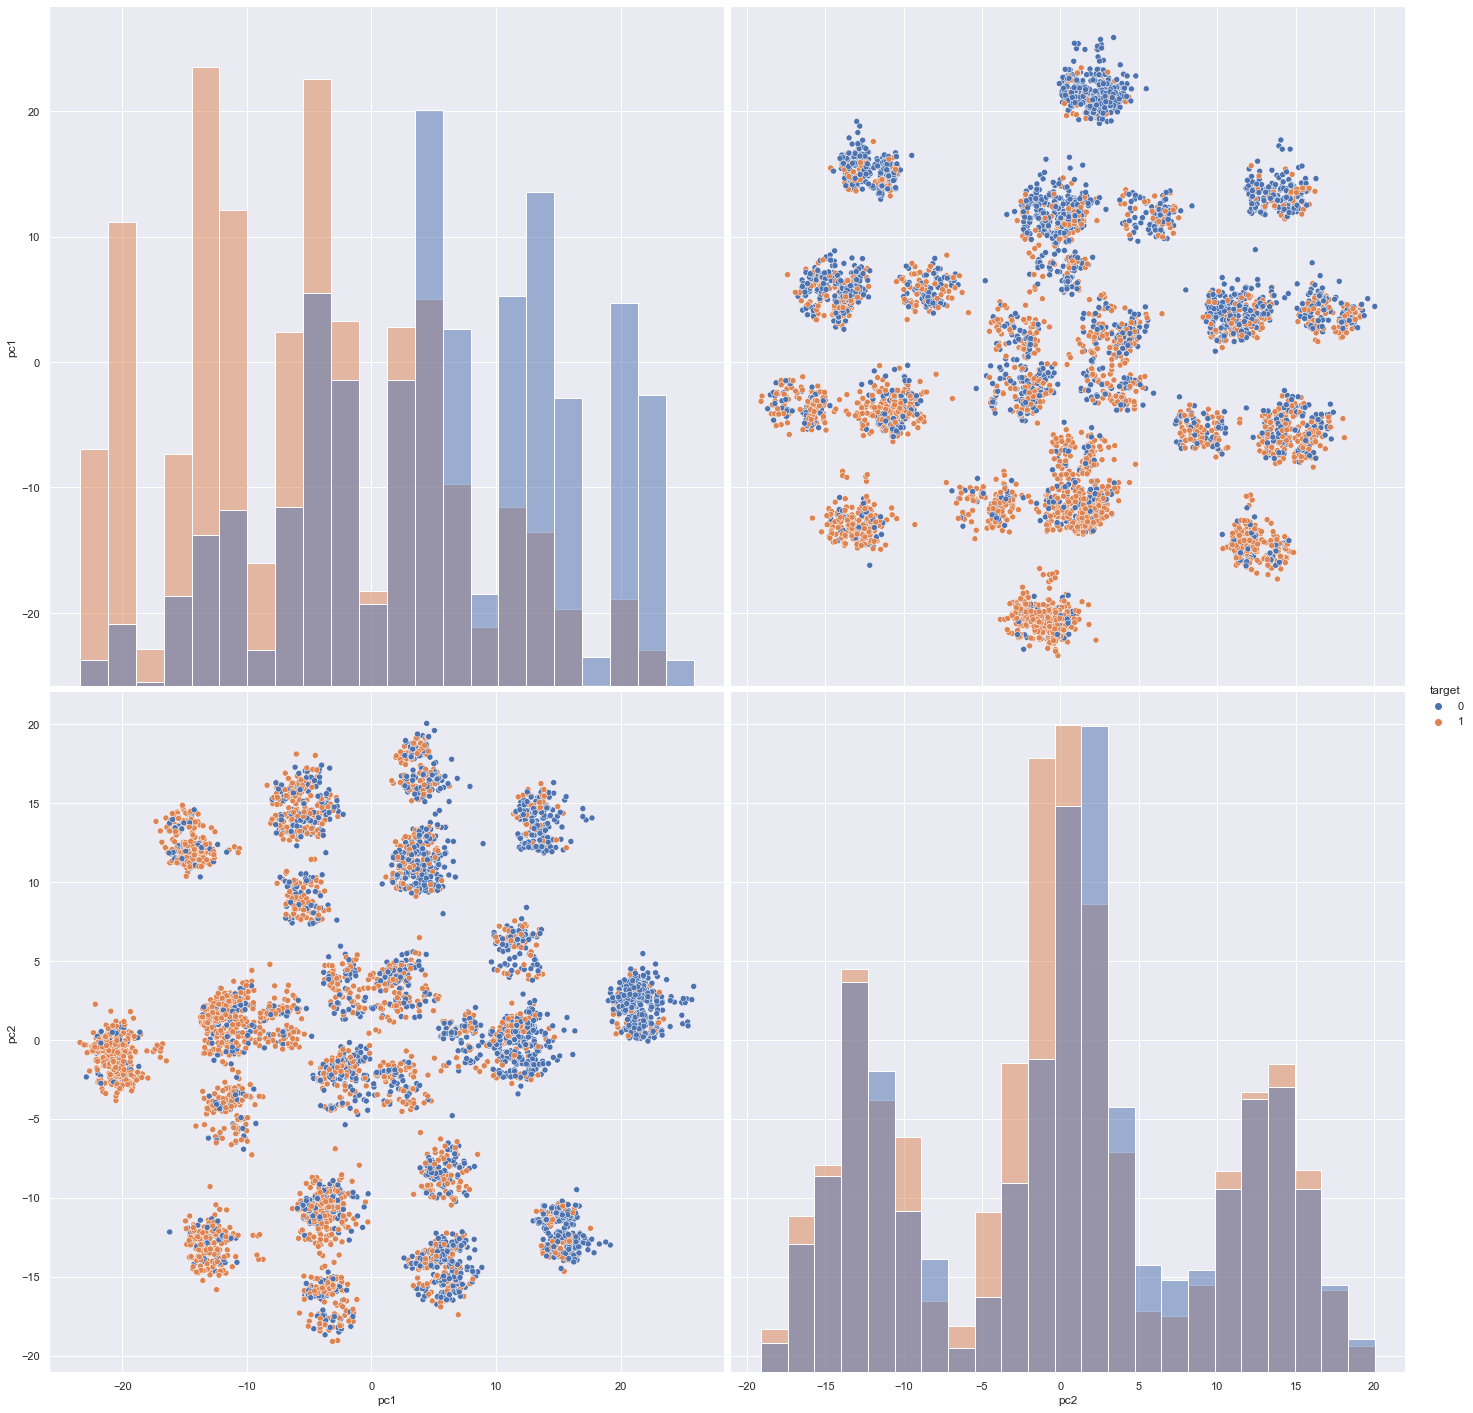

In [39]:
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)
new_df = pd.DataFrame(X_transformed, columns=['pc1', 'pc2'])
new_df['target'] = df['result']
sns.pairplot(new_df, vars=['pc1', 'pc2'],hue='target', diag_kind='hist',height=10)
plt.show()

In [40]:
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline


pca = Pipeline([("standarize", StandardScaler()), ("pca",PCA(n_components = 3)), ("dataframe", FunctionTransformer(lambda x: pd.DataFrame(x, columns = ["First Comp", "Second Comp", "Third Comp"])))]).fit(X)
X3D = pca.transform(X)
px.scatter_3d(x = "First Comp", y = "Second Comp",z = "Third Comp", data_frame= X3D, color= y)

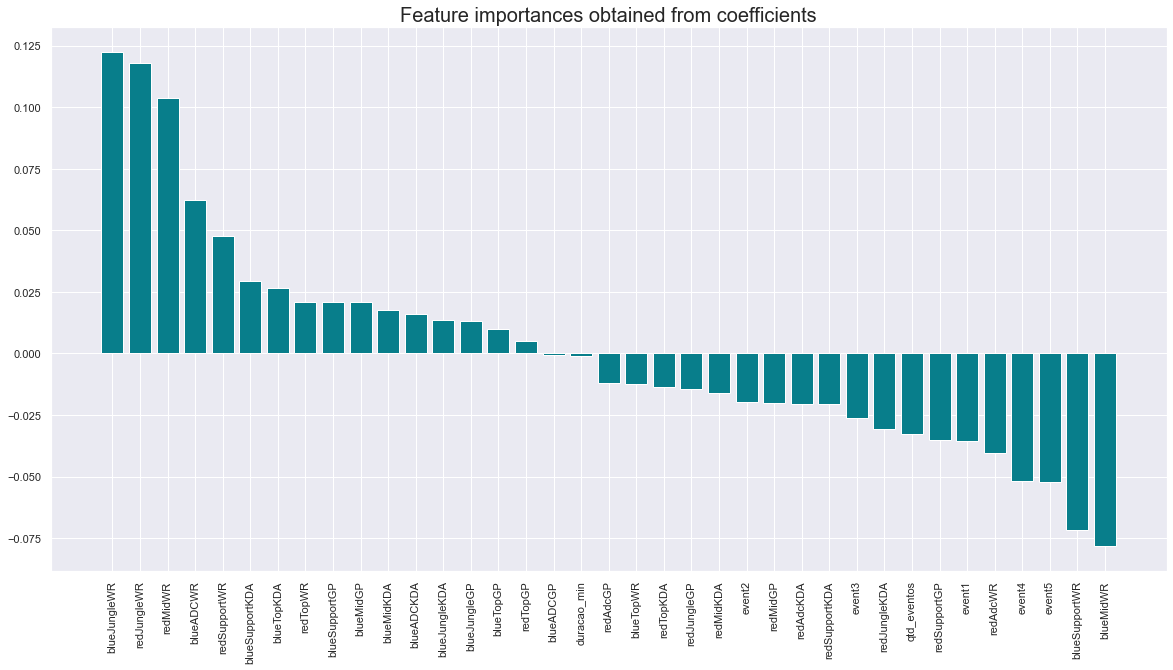

In [41]:
# Fonte dos plots abaixo: https://betterdatascience.com/feature-importance-python/
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=50000)
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.rcParams["figure.figsize"] = (20, 10)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

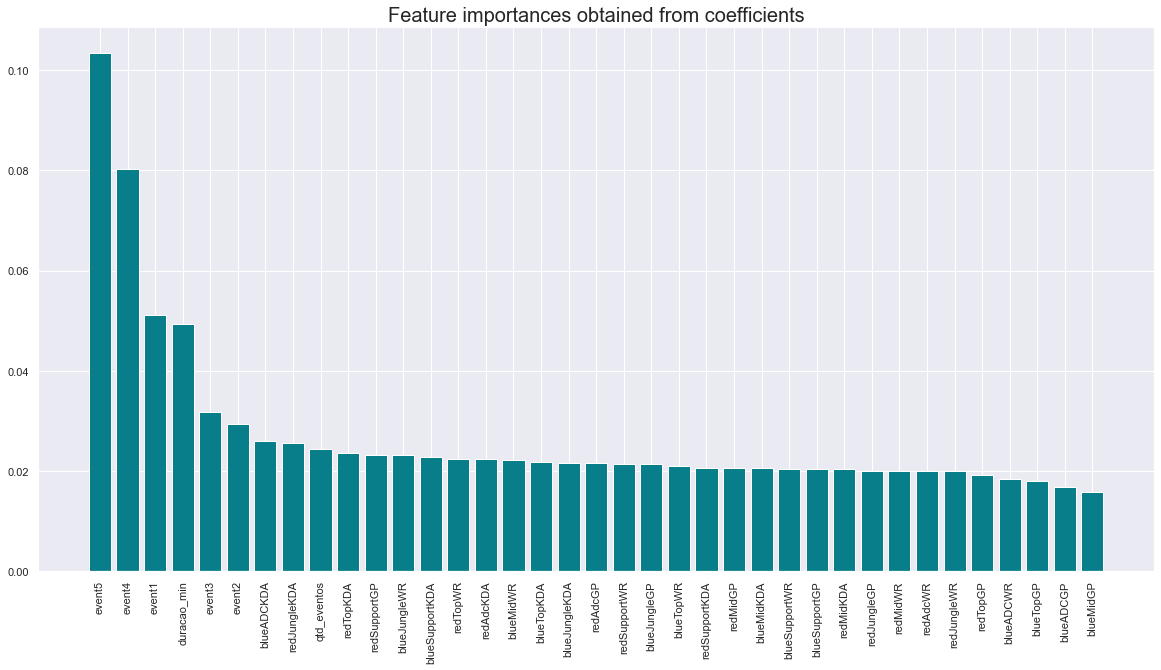

In [42]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

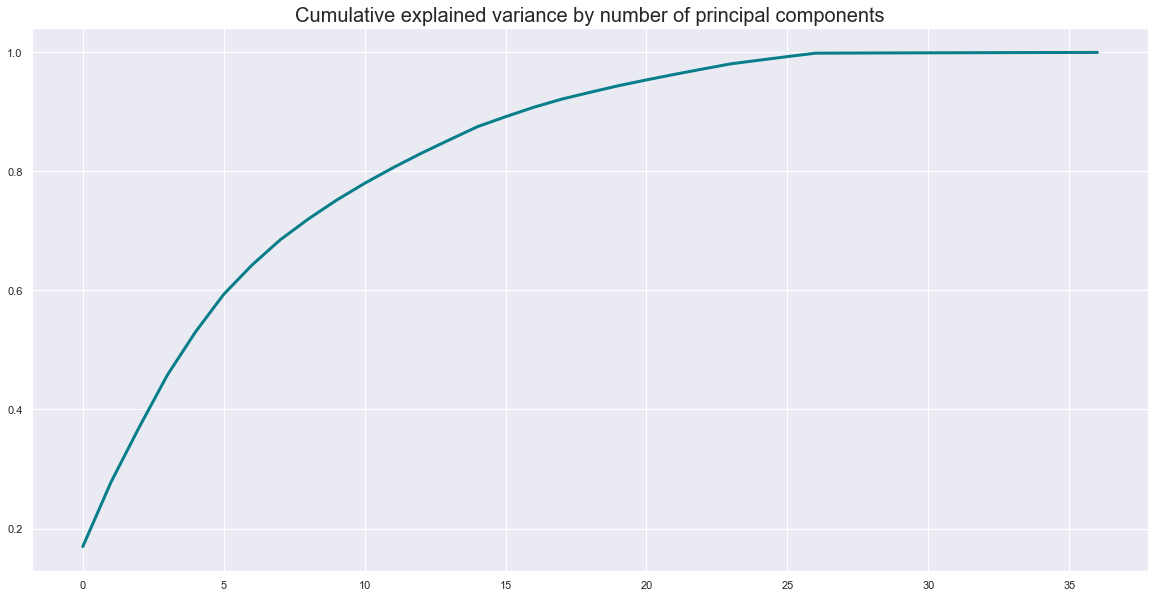

In [43]:
from sklearn.decomposition import PCA

pca = PCA().fit(x)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [44]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(x.columns) + 1)],
    index=x.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37
event1,5.519028,0.939912,5.533732,-5.015163,1.812975,-0.469929,-0.182704,0.053689,0.005702,-0.006638,...,-0.000350,-0.000038,0.000251,-0.000023,0.000196,0.000017,-0.000151,0.000040,0.000022,-0.000135
event2,4.945786,-6.005308,-2.665262,1.115274,4.552598,-0.234609,0.172828,0.125100,-0.087194,-0.044839,...,0.000239,0.000106,-0.000113,-0.000039,0.000037,-0.000015,0.000143,0.000121,0.000037,0.000034
event3,3.765233,7.102276,-1.091431,3.547236,3.283948,-0.319078,0.087622,0.024018,-0.069619,0.037507,...,0.000322,0.000127,0.000006,0.000083,0.000143,0.000329,0.000144,-0.000160,-0.000089,-0.000074
event4,5.962601,-1.829304,3.404498,4.996586,-3.811120,0.268523,-0.074911,0.219490,0.193668,0.127048,...,0.000116,0.000019,0.000182,0.000264,-0.000155,0.000291,-0.000085,-0.000004,-0.000325,-0.000317
event5,6.308204,1.381511,-5.303544,-3.328310,-3.466224,0.440998,-0.036904,0.351244,-0.006851,0.053298,...,-0.000404,-0.000166,0.000047,-0.000272,-0.000111,-0.000149,-0.000036,-0.000046,0.000089,0.000023


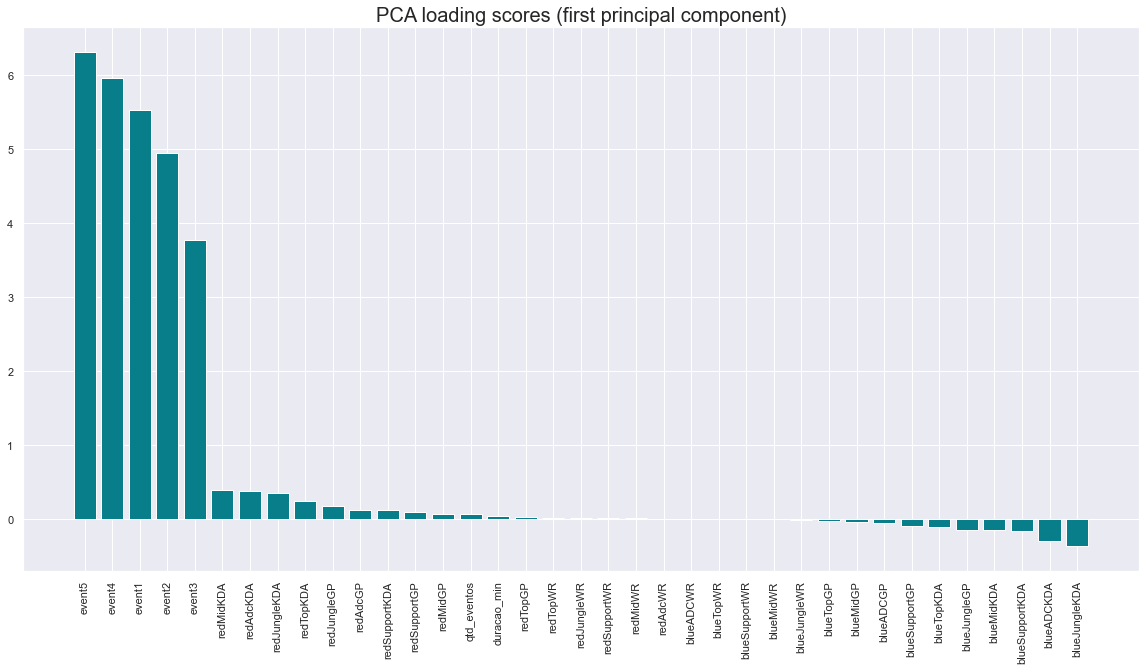

In [45]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6014 samples in 0.001s...
[t-SNE] Computed neighbors for 6014 samples in 0.846s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6014
[t-SNE] Computed conditional probabilities for sample 2000 / 6014
[t-SNE] Computed conditional probabilities for sample 3000 / 6014
[t-SNE] Computed conditional probabilities for sample 4000 / 6014
[t-SNE] Computed conditional probabilities for sample 5000 / 6014
[t-SNE] Computed conditional probabilities for sample 6000 / 6014
[t-SNE] Computed conditional probabilities for sample 6014 / 6014
[t-SNE] Mean sigma: 7.984974
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.313927
[t-SNE] KL divergence after 300 iterations: 1.827286
